# A. Phần lập trình

## Titanic Survival Prediction

### 1. Tải bộ dữ liệu

### 2. Import libraries:

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 3. Đọc dữ liệu

Sử dụng thư viện pandas để đọc file .csv thành DataFrame

In [18]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

In [19]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


### 4. Chia biến X, y

Chuyển đổi DataFrame hiện tại thành array và tách hai biến X, y

In [20]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

### 5. Thêm bias vào X

 Khi sử dụng thư viện, bias sẽ được thêm tự động vào X. Tuy nhiên, khi
 triển khai lại từ đầu, chúng ta cần phải tự thêm bias vào mỗi mẫu dữ liệu, nhằm thỏa mãn công thức hàm dự đoán

In [21]:
intercept = np.ones((
    X.shape[0], 1)
)
X_b = np.concatenate(
    (intercept, X),
    axis=1
)

### 6. Chia tập train, val, test

Sau khi đã hoàn chỉnh biến X, chúng ta tiến hành chia ba bộ
 train, val, test với tỉ lệ 7:2:1.

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### 7. Chuẩn hóa dữ liệu

 Ta sử dụng X_train vừa tạo ở bước trên fit vào hàm chuẩn hóa
 StandardScaler. Sau đó, đem scaler này chuẩn hóa cho tập X_val và X_test (lưu ý rằng ta
 không chuẩn hóa bias nên sẽ bỏ qua cột đầu tiên trong X)

In [23]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

### 8. Cài đặt các hàm quan trọng

- Hàm sigmoid

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

- Hàm dự đoán

In [25]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat

- Hàm tính loss

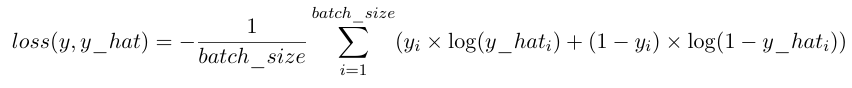

In [26]:
def compute_loss(y_hat, y):
    y_hat = np.clip(
        y_hat, 1e-7, 1 - 1e-7
    )

    return (
        -y * \
        np.log(y_hat) - (1 - y) * \
        np.log(1 - y_hat)
    ).mean()

- Hàm tính gradient

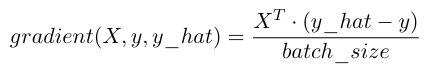

In [27]:
def compute_gradient(X, y, y_hat):
    return np.dot(
        X.T, (y_hat - y)
    ) / y.size

- Hàm cập nhật trọng số

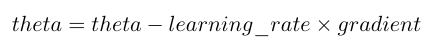

In [28]:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

- Hàm tính độ chính xác

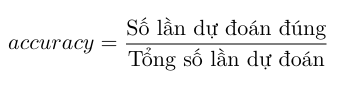

In [29]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

### 9. Khai báo các siêu tham số và khởi tạo weights

In [30]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

### 10. Huấn luyện mô hình

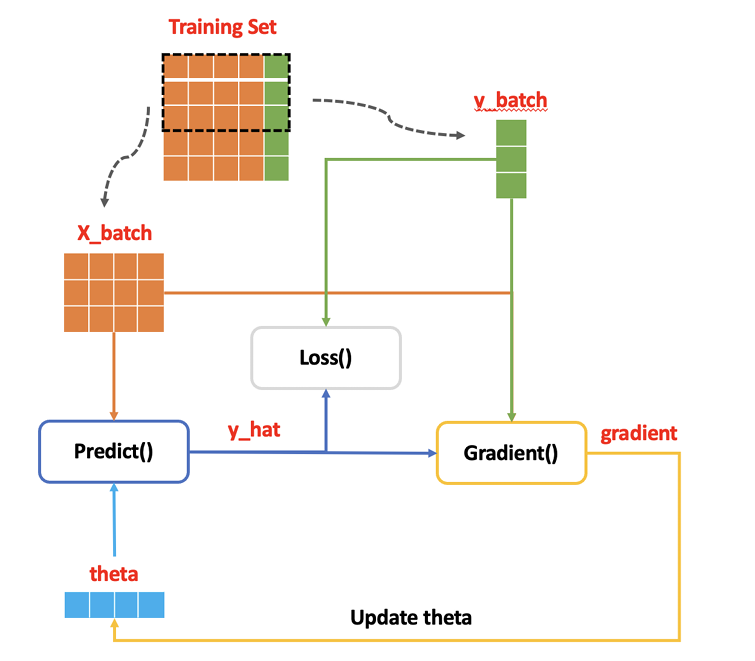

In [31]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\
          tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.702          tValidation loss: 0.598

EPOCH 2:	Training loss: 0.667          tValidation loss: 0.580

EPOCH 3:	Training loss: 0.637          tValidation loss: 0.565

EPOCH 4:	Training loss: 0.610          tValidation loss: 0.553

EPOCH 5:	Training loss: 0.587          tValidation loss: 0.542

EPOCH 6:	Training loss: 0.567          tValidation loss: 0.533

EPOCH 7:	Training loss: 0.549          tValidation loss: 0.526

EPOCH 8:	Training loss: 0.534          tValidation loss: 0.520

EPOCH 9:	Training loss: 0.520          tValidation loss: 0.515

EPOCH 10:	Training loss: 0.509          tValidation loss: 0.511

EPOCH 11:	Training loss: 0.498          tValidation loss: 0.508

EPOCH 12:	Training loss: 0.490          tValidation loss: 0.506

EPOCH 13:	Training loss: 0.482          tValidation loss: 0.504

EPOCH 14:	Training loss: 0.475          tValidation loss: 0.503

EPOCH 15:	Training loss: 0.469          tValidation loss: 0.501

EPOCH 16:	Training loss: 0.464   

Trực quan hóa kết quả thành đồ thị:

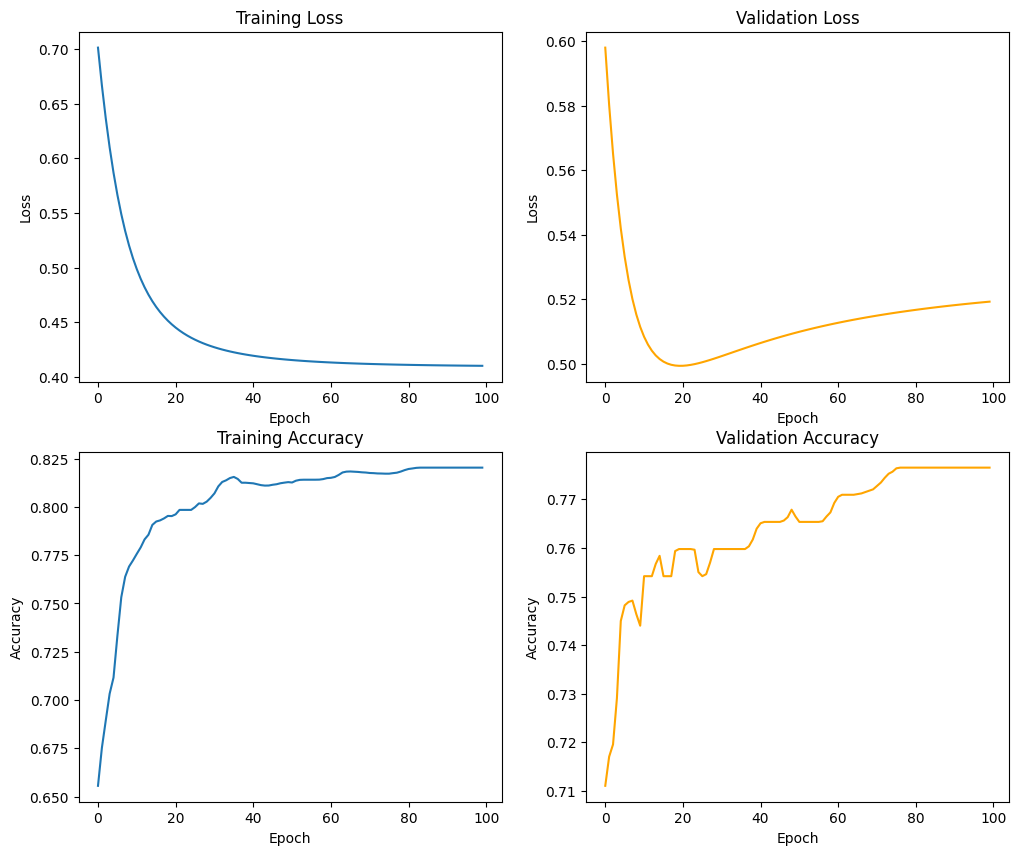

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [33]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.776536312849162
Accuracy: 0.75


## Twitter Sentiment Analysis

### 1. Tải bộ dữ liệu

###  2. Import libraries

In [34]:
import pandas as pd 
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

### 3. Đọc bộ dữ liệu

In [35]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
    dataset_path,
    index_col='id'
)

In [36]:
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


### 4. Tiền xử lý bộ dữ liệu

 (a) **Xây dựng hàm chuẩn hóa văn bản**: Văn bản gốc có rất nhiều kí tự thừa thải, vô
 nghĩa... Vì vậy, ta cần loại bỏ chúng cũng như áp dụng thêm vài các bước chuẩn hóa văn
 bản khác để văn bản đầu vào trở nên ít phức tạp hơn, nhằm tăng cường hiệu quả biểu
 diễn của vector đặc trưng sau này:

In [37]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

Trong đó:

– Dòng 1: Khai báo hàm text_normalize() nhận đầu vào là một string (text).

– Dòng 2, 3: Loại bỏ các từ "RT" trong text (đây là một cụm từ viết tắt cũ cho
 "Retweet").
 
 – Dòng 5, 6: Loại bỏ các đường dẫn trong text.
 
 – Dòng 8, 9: Loại bỏ các hashtag.
 
 – Dòng 11, 12: Loại bỏ các dấu câu.
 
 – Dòng 14, 15, 16, 17, 18, 19: Khai báo tokenizer.
 
 – Dòng 20: Tokenize text (kết quả trả về là danh sách các token)

 – Dòng 22: Trả về danh sách các token.

 (b) **Xây dựng bộ lưu giữ tần suất xuất hiện của các từ**: Có rất nhiều cách để ta có
 thể tạo vector biểu diễn cho một đoạn văn bản. Trong bài tập này, chúng ta sẽ sử dụng
 loại vector lưu trữ số lần xuất hiện của các từ thuộc class "positive" và các từ thuộc
 class "negative" trong một văn bản. Để làm được điều này, đầu tiên chúng ta cần phải
 xây dựng một bộ từ điển lưu trữ tần suất xuất hiện của toàn bộ mọi từ trong bộ dữ liệu
 với class tương ứng của nó. 

In [38]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']
        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

Trong đó:

– Dòng 1: Khai báo hàm get_freqs() với tham số đầu vào là DataFrame chứa bộ dữ
 liệu (df).
 
 – Dòng 2: Khai báo một defaultdict (defaultdict khác với dict thông thường ở điểm
 defaultdict tự động gán giá trị mặc định cho các key mới, ở đây ta gán bằng 0).
 
 – Dòng 3, 4, 5: Duyệt qua từng dòng tweet và label tương ứng:
 
 – Dòng 7: Chuẩn hóa dòng tweet hiện tại.
 
 – Dòng 8, 9, 10: Duyệt qua từng từ (token) trong tweet hiện tại, khai báo key có
 dạng tuple (token, label) và tăng giá trị của key lên 1.
 
 – Dòng 12: Trả về dictionary lưu giữ tần suất xuất hiện của các từ.

 (c) **Xây dựng hàm tạo vector đặc trưng**: Kết hợp hai thành phần trên, ta xây dựng
 một hàm tạo vector đặc trưng cho văn bản đầu vào.

In [39]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

 Trong đó:
 
 – Dòng 1: Khai báo hàm get_feature() nhận tham số đầu vào là đoạn văn bản (text)
và dictionary lưu giữ tần suất xuất hiện các từ (freqs).
 
 – Dòng 2: Chuẩn hóa văn bản đầu vào.
 
 – Dòng 4: Tạo một vector biểu diễn văn bản giá trị 0 có 3 phần tử, đại diện cho
 (intercept, n_positives, n_negatives)– Dòng 5: Gán phần tử đầu tiên giá trị 1 
 (intercept).
 
 – Dòng 7, 8, 9: Duyệt qua từng từ trong văn bản đầu vào, lấy giá trị tần suất của từ
ứng với từng label và cộng dồn vào vị trí phần tử trong vector biểu diễn tương ứng.

– Dòng 11: Trả về vector biểu diễn.

 (d) **Trích xuất đặc trưng toàn bộ dữ liệu**: Cuối cùng, ta sử dụng hàm get_feature() ở
 trên để đổi toàn bộ văn bản thành vector biểu diễn mới như sau:

In [40]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

### 5.Chia bộ train,val,test

In [41]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### 6. Chuẩn hóa dữ liệu

In [42]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

### 7. Cài đặt các hàm quan trọng

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(
        y_hat, 1e-7, 1 - 1e-7
    )

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(
        X.T, (y_hat - y)
    ) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

### 8. Khai báo các siêu tham số và khởi tạo weights

Trong bài này, vì số lượng mẫu dữ liệu nhiều hơn bài Titanic ta có thể cân nhắc tăng số batchsize lên để tăng tốc độ huấn luyện (ví dụ ở đây ta cài batch_size=128).

In [44]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

### 9. Huấn luyện mô hình

In [45]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\
          tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.707          tValidation loss: 0.704

EPOCH 2:	Training loss: 0.661          tValidation loss: 0.659

EPOCH 3:	Training loss: 0.624          tValidation loss: 0.622

EPOCH 4:	Training loss: 0.594          tValidation loss: 0.591

EPOCH 5:	Training loss: 0.569          tValidation loss: 0.566

EPOCH 6:	Training loss: 0.548          tValidation loss: 0.546

EPOCH 7:	Training loss: 0.531          tValidation loss: 0.528

EPOCH 8:	Training loss: 0.516          tValidation loss: 0.514

EPOCH 9:	Training loss: 0.504          tValidation loss: 0.502

EPOCH 10:	Training loss: 0.494          tValidation loss: 0.491

EPOCH 11:	Training loss: 0.485          tValidation loss: 0.483

EPOCH 12:	Training loss: 0.477          tValidation loss: 0.475

EPOCH 13:	Training loss: 0.471          tValidation loss: 0.468

EPOCH 14:	Training loss: 0.465          tValidation loss: 0.463

EPOCH 15:	Training loss: 0.460          tValidation loss: 0.457

EPOCH 16:	Training loss: 0.456   

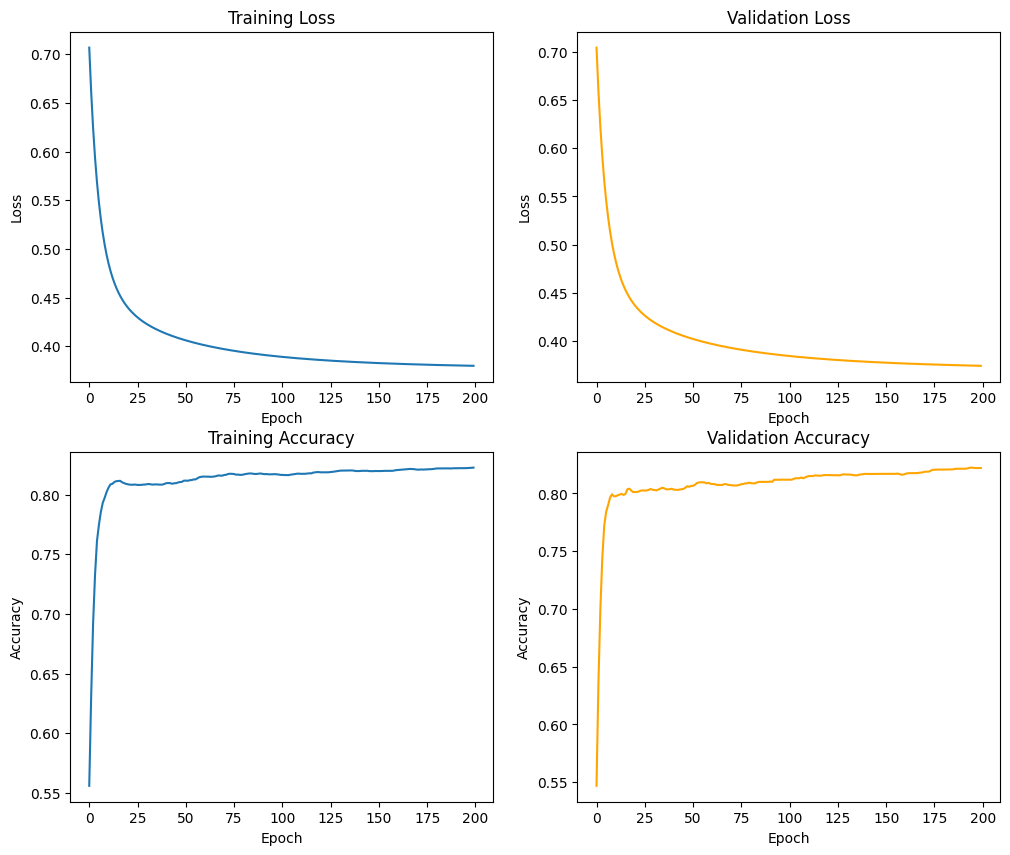

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

### 10. Đánh giá mô hình

In [47]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.821969696969697
Accuracy: 0.8434343434343434


# B. Phần trắc nghiệm

Câu 1:

In [48]:
# Đáp án: A

Câu 2:

In [50]:
# Đáp án: D

Câu 3:

In [51]:
# Đáp án: B

câu 4:

In [52]:
# Đáp án: B

Câu 5:

In [53]:
# Đáp án: D

Câu 6:

In [54]:
# Đáp án: C

Câu 7:

In [55]:
# Đáp án: B

Câu 8:

In [56]:
# Đáp án: A

Câu 9:

In [57]:
# Đáp án: C

Câu 10:

In [ ]:
# Đáp án: A

Câu 11:

In [59]:
# Đáp án: D

Câu 12:

In [60]:
# Đáp án: D

Câu 13:

In [61]:
# Đáp án: C

Câu 14:

In [62]:
# Đáp án: A

Câu 15:

In [63]:
# Đáp án: B